# Problem Set 4, due March 16 at 11:59pm

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.formula.api  import ols
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
# Load you data the Boston Housing data into a dataframe
# MEDV.txt containt the median house values and data.txt the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

# load Boston housing data set
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

#combining data into dataframe 
boston_data = pd.DataFrame(data)
boston_data.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston_data['MEDV']= target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2


---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [3]:
#a) Regressing the housing price on the number of rooms per house
model1 = ols(formula = 'MEDV ~  RM', data = boston_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     452.3
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           4.12e-72
Time:                        15:31:30   Log-Likelihood:                -1678.2
No. Observations:                 506   AIC:                             3360.
Df Residuals:                     504   BIC:                             3369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.5762      2.748    -12.944      0.000     -40.976     -30.176
RM             8.9599      0.421     21.267      0.000       8.132       9.788
==============================================================================
Omnibus:                      105.253   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.717
Skew:                           0.763   Prob(JB):                    4.87e-132
Kurtosis:                       8.133   Cond. No.                         61.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#b) Regressing the housing price on the number of rooms per house and the (number of rooms per house) squared 
model2 = ols(formula = 'MEDV ~  RM +  I(RM**2)', data = boston_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     294.5
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           2.19e-85
Time:                        15:31:34   Log-Likelihood:                -1644.1
No. Observations:                 506   AIC:                             3294.
Df Residuals:                     503   BIC:                             3307.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.7363     12.865      5.576      0.000      46.460      97.013
RM           -23.7896      3.867     -6.152      0.000     -31.387     -16.192
I(RM ** 2)     2.4691      0.290      8.513      0.000       1.899       3.039
==============================================================================
Omnibus:                       83.768   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.703
Skew:                           0.270   Prob(JB):                    5.87e-202
Kurtosis:                       9.608   Cond. No.                     2.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model a)
* R-Squared: 0.473
* Adjusted R-Squared: 0.472

Model b)
* R-Squared:0.539
* Adjusted R-Squared:0.538

The model b with quadratic interaction has improved in adjusted r-squared, that is, it has better goodness of fit as compared to model a which only has the linear interaction between the dependent and the independent variables.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 25-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 25 slope coefficients using a histogram, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

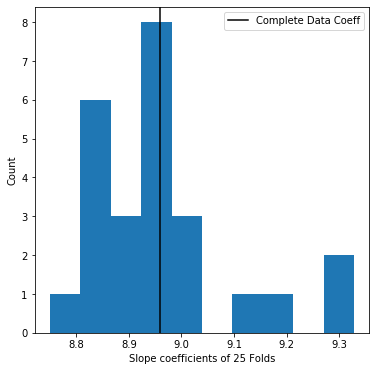

In [5]:
X=boston_data['RM'].copy()
Y=boston_data['MEDV'].copy()

n_folds=25
kf = KFold(n_splits=n_folds, shuffle=True, random_state=11)

#Getting index
train_idx = []
test_idx = []
for train, test in kf.split(X):
    train_idx.append(train)
    test_idx.append(test)
    
#Fitting Regression
coeffs = np.zeros(n_folds)

for i in range(n_folds):
    model = LinearRegression().fit(X[train_idx[i]].values.reshape(-1,1), Y[train_idx[i]])
    coeffs[i] = model.coef_[0]
    
#Plotting
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

ax.hist(coeffs)
ax.axvline(model1.params[1], c='k', label='Complete Data Coeff')
ax.set_xlabel('Slope coefficients of 25 Folds')
ax.set_ylabel('Count')
ax.legend()

plt.show(fig)


In [6]:
print('Mean of Coefficent from 25 fold:')
print(np.mean(coeffs))
print()
print('Coefficent from part 1.2 model a:')
print(model1.params[1])

Mean of Coefficent from 25 fold:
8.96095080850663

Coefficent from part 1.2 model a:
8.959927212241066


The mean of the coefficient for the room variable from 25-fold validation is very close to the coefficient value from model above.

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

Note: You can get 2 points even without the confidence bands (if the other lines are correct, the axes are labeled, the lines are labeled, the points are plotted correctly, and so forth). If you do everything perfectly including the confidence bands, you get 2 points. If you do something else wrong and would normally receive less than two points, the confidence intervals can replace lost points up to 0.5.

Useful reference: [1](https://www.medcalc.org/manual/scatter_diagram_regression_line.php), [2](https://rpubs.com/aaronsc32/regression-confidence-prediction-intervals)

You can directly use some packages to calculate the bands.

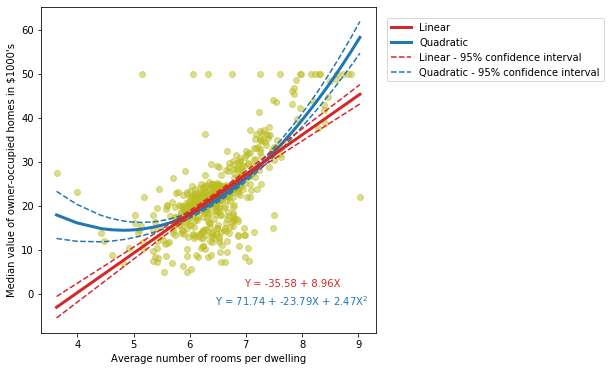

In [7]:
#geting confidecne intervals
from statsmodels.stats.outliers_influence import summary_table

st_a, data_a, ss2_a = summary_table(model1, alpha=0.05)
st_b, data_b, ss2_b = summary_table(model2, alpha=0.05)
ci_low_a, ci_upp_a = data_a[:,4:6].T
ci_low_b, ci_upp_b = data_b[:,4:6].T

X_sorted_idx=np.argsort(boston_data['RM'].values)

X_sorted = X.sort_values()

#Plotting
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

ax.scatter(X, Y, alpha=0.5, c='C8')

#Predictions from Models
Y_a_plot = model1.params[0] + model1.params[1]*X_sorted
Y_b_plot = model2.params[0] + model2.params[1]*(X_sorted) + model2.params[2]*(X_sorted**2)

ax.plot(X_sorted, Y_a_plot, c='C3', lw=3, label='Linear', zorder=2)
ax.plot(X_sorted, Y_b_plot, c='C0', lw=3, label='Quadratic', zorder=1)

#Plotting CF Interval
ax.plot(X_sorted, ci_low_a[X_sorted_idx], ls='--', c='C3', zorder=2, label='Linear - 95% confidence interval')
ax.plot(X_sorted, ci_upp_a[X_sorted_idx], ls='--', c='C3', zorder=2, label='__nolegend__')

ax.plot(X_sorted, ci_low_b[X_sorted_idx], ls='--', c='C0', zorder=1, label='Quadratic - 95% confidence interval')
ax.plot(X_sorted, ci_upp_b[X_sorted_idx], ls='--', c='C0', zorder=1, label='__nolegend__')

# Equation
ax.text(0.75, 0.15,
        'Y = {:.2f} + {:.2f}X'.format(model1.params[0], model1.params[1]),
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes,color='C3')
ax.text(0.75, 0.10,
        'Y = {:.2f} + {:.2f}X + {:.2f}X$^2$ '.format(model2.params[0], model2.params[1], model2.params[2]),
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes,color='C0')

ax.set_xlabel('Average number of rooms per dwelling')
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 0.98));

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [8]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
alpha_int : float
    initial alpha

beta_int : float
    initial beta
    
epsilon : float
    Threshold for convergence 
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, alpha_int, beta_int, epsilon, R=0.01, MaxIterations=1000):

    start_time = time.time()
    
    #Used initialized coefficients
    alpha = alpha_int
    beta = beta_int
    
    N = len(yvalues)
    
    # Loop till maximum iterations are achieved
    for i in range(MaxIterations):
        
        # compute new coefficients
        new_alpha = alpha - ((R/N) * np.sum(alpha + beta*xvalues - yvalues))
        new_beta = beta - ((R/N) * np.sum((alpha + beta*xvalues - yvalues)*xvalues))
        
        # Check for stopping criteria
        if (np.abs(new_alpha-alpha)<epsilon) and (np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
    
    # Calculate the number of iteration
    iterations = i+1
    
    if iterations==MaxIterations:
        print("Stopped because maximum number of iterations reached!!!")    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta    

In [9]:
X = boston_data['RM'].values.copy()
Y = boston_data['MEDV'].values.copy()

# initialize alpha and beta
alpha_int = -30
beta_int = 6

# Using R = 0.01
print('Using R = 0.01')
alpha, beta = bivariate_ols(X, Y, alpha_int, beta_int,R=0.01, epsilon=0.00004, MaxIterations=50000)
print('alpha      = {:.2f}'.format(alpha))
print('beta       = {:.2f}'.format(beta))

print()
# Using R = 0.001
print('Using R = 0.001')
alpha, beta = bivariate_ols(X, Y, alpha_int, beta_int,R=0.001, epsilon=0.00004, MaxIterations=50000)
print('alpha      = {:.2f}'.format(alpha))
print('beta       = {:.2f}'.format(beta))

print()
# Using R = 0.0001
print('Using R = 0.0001')
alpha, beta = bivariate_ols(X, Y,alpha_int, beta_int,R=0.0001, epsilon=0.00004, MaxIterations=50000)
print('alpha      = {:.2f}'.format(alpha))
print('beta       = {:.2f}'.format(beta))

print()
# Using R = 0.00001
print('Using R = 0.00001')
alpha, beta = bivariate_ols(X, Y,alpha_int, beta_int,R=0.00001, epsilon=0.00004, MaxIterations=50000)
print('alpha      = {:.2f}'.format(alpha))
print('beta       = {:.2f}'.format(beta))

Using R = 0.01
Total Iterations: 24713
Time taken: 0.70 seconds
alpha      = -35.23
beta       = 8.91

Using R = 0.001
Total Iterations: 45525
Time taken: 1.14 seconds
alpha      = -32.07
beta       = 8.43

Using R = 0.0001
Total Iterations: 1248
Time taken: 0.03 seconds
alpha      = -29.70
beta       = 8.05

Using R = 0.00001
Total Iterations: 7150
Time taken: 0.19 seconds
alpha      = -29.70
beta       = 7.97


In [10]:
#Coefficientts from standard libraries 
model1.params

Intercept   -35.576207
RM            8.959927
dtype: float64

As seen above, coefficent estimated by our own GD algorithm are quite close to the ones estimated by the standard libraries in part a. Also, since the value are closer but not exactly same while using different values of R, it depends on R (and also on the intialized values of alpha and beta)

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [11]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [12]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable

alpha_int : float
    initial alpha

beta_int : array 
    initial beta values for different variables
    
epsilon : float
    Threshold for convergence 
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues,alpha_int,betas_int,epsilon, R=0.01, MaxIterations=1000):
    
    # start the clock
    start_time = time.time()
    
    # use initial coefficients provided
    alpha = alpha_int
    beta = betas_int
    
    N = len(yvalues)
    
    # loop until the max iterations
    for i in range(MaxIterations):
        
        # compute new coefficients
        new_alpha = alpha - ((R/N) * np.sum(alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues))
        new_beta = beta - ((R/N) * np.sum((alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues)*(xvalue_matrix.T), axis=1))

        # check to see the stopping condition
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
            
    #total iterations
    iterations = i+1
    
    if iterations==MaxIterations:
        print("Stopped because maximum number of iterations reached!!!")    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [13]:
X = standardize(boston_data[['CRIM','RM']].values.copy())
Y = boston_data['MEDV'].values.copy()

# initial alpha, beta
alpha_int = 0
beta_int = np.array([0,0])

# Using R = 0.1
print('Using R = 0.1')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.1, epsilon=0.00004, MaxIterations=50000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()

# Using R = 0.01
print('Using R = 0.01')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.01, epsilon=0.00004, MaxIterations=50000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# Using R = 0.001
print('Using R = 0.001')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.001, epsilon=0.00004, MaxIterations=50000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# Using R = 0.0001
print('Using R = 0.0001')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.0001, epsilon=0.00004, MaxIterations=50000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# Using R = 0.00001
print('Using R = 0.00001')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.00001, epsilon=0.00004, MaxIterations=50000)
print('alpha      = {:.2f}'.format(alpha))
print('betas      = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

Using R = 0.1
Total Iterations: 105
Time taken: 0.01 seconds
alpha      = 22.53
betas       = -2.24, 5.82

Using R = 0.01
Total Iterations: 861
Time taken: 0.07 seconds
alpha      = 22.53
betas       = -2.24, 5.82

Using R = 0.001
Total Iterations: 6332
Time taken: 0.55 seconds
alpha      = 22.49
betas       = -2.25, 5.80

Using R = 0.0001
Total Iterations: 40312
Time taken: 3.37 seconds
alpha      = 22.13
betas       = -2.29, 5.71

Using R = 0.00001
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 4.08 seconds
alpha      = 8.87
betas      = -1.27, 2.42


* With smaller values of R, it takes more time to converge. 
* Also, the coefficients are different with different R values. 
* In the last iteration, algorithm converged because of max iterations being reached, thus the coefficients are not same as the ones got in other experiments. All the other experiments gave similar values of coefficients.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [14]:
#Same experiment as 2.3 without standardizing X
X = boston_data[['CRIM','RM']].values.copy()
Y = boston_data['MEDV'].values.copy()

# initial alpha, beta
alpha_int = 0
beta_int = np.array([0,0])

# Using R = 0.1
print('Using R = 0.1')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.1, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# Using R = 0.01
print('Using R = 0.01')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.01, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# Using R = 0.001
print('Using R = 0.001')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

Using R = 0.1


C:\Users\madan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\madan\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in subtract


Stopped because maximum number of iterations reached!!!
Total Iterations: 1000000
Time taken: 79.06 seconds
alpha      = nan
betas       = nan, nan

Using R = 0.01
Total Iterations: 41403
Time taken: 3.19 seconds
alpha      = -29.60
betas       = -0.26, 8.19

Using R = 0.001
Total Iterations: 197091
Time taken: 15.08 seconds
alpha      = -26.21
betas       = -0.27, 7.68


Without standardization, it takes a lot of time to convege. Even after increasing the no of max iterations to 1+e6, with learning rate of 0.1, the algorithm didn't converge. Also, the coefficients are different from the ones we got with standardized values. 

### **2.5 Implement  Mini-Batch Gradient Descent (MB-GD)**
MB-GD is a Gradient Descent variant that in large data sets can converge faster and is computationally less intensive. Implement MB-GD for question 2.3. Tune the learning rate, number of iterations and "mini-batch" size
so that you compute the estimates within a 1e-2 tolerance. Do not use a batch-size greater than 32.
In summary you go over the entire data set for n epochs. At the beginning of each epoch you shuffle your data once and then you pick k batches (approximately k=#of data points/batch_size). For each batch you compute the gradient, update the parameters and move to the next batch.
MB-GD is similar to Stochastic Gradient Descent but instead of using one sample to compute the gradient we use a batch of samples at each iteration. You can find details about MB-GD here:
https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [26]:
# Your code here
def hypothesis(X, beta): 
    return np.dot(X, beta) 
  
def gradient(X, y, beta): 
    h = hypothesis(X, beta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad

def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

def miniBatchGradientDescent(X, y, learning_rate = 0.001, batch_size=21): 
    start_time=time.time()
    alpha = 0
    beta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    epochs = 10
    for i in range(epochs):
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            beta = beta - learning_rate * gradient(X_mini, y_mini, beta) 
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return beta


In [25]:
X = standardize(boston_data[['CRIM','RM']].values.copy())
X_padded = np.pad(X, ((0, 0), (1,0)), 'constant',constant_values=1)
y = boston_data['MEDV'].values.copy().reshape(-1,1)

miniBatchGradientDescent(X_padded,y)

Time taken: 0.01 seconds


array([[22.4002505 ],
       [-2.30621789],
       [ 5.81910384]])

* Used epoch = 10, learning rate = 0.001 and batch_size=21 for convergence

* Yes, there is a speed up in the convergence. It only took 0.01 seconds now with Mini Batch GD as compared to more than 1 second before.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

*NOTE: * If using k-fold cross-validation, you will end up with a different set of parameters for each fold. In this case, use the parameters from the fold that has the highest test performance.

In [28]:
# Splitting into train and test
train, test = train_test_split(boston_data, test_size=0.34, random_state=15)

X_train = standardize(train[['CRIM','RM']].values.copy())
Y_train = train['MEDV'].values.copy()

alpha_int = 0
beta_int = np.array([0,0])

# Using R = 0.001
print('Using R = 0.001')
alpha_train, beta_train = multivariate_ols(X_train, Y_train, alpha_int, beta_int, R=0.001, epsilon=1e-5, MaxIterations=50000)
print('alpha_train      = {:.2f}'.format(alpha))
print('beta_train       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))       

Using R = 0.001
Total Iterations: 7715
Time taken: 0.57 seconds
alpha_train      = -26.21
beta_train       = -0.27, 7.68


There is a change in the values of the coefficients after dividing the data into train and test set and estimating the value of coefficients on train set again.


### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above, predict the values for just the test instances, and compare the actual to the predicted values. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [29]:
X_test = standardize(test[['CRIM','RM']].values.copy())
Y_test = test['MEDV'].values.copy()

# Predicted on test data
Y_test_predicted = alpha_train + beta_train[0]*X_test[:,0] + beta_train[1]*X_test[:,1]

#RMSE
rmse_test = np.sqrt(np.sum((Y_test_predicted - Y_test)**2)/len(Y_test))

print('RMSE on test data = {:.2f}'.format(rmse_test))

RMSE on test data = 6.26


My Test RMSE came around to be 6.26. As compared to the last problem set on the normalized data, the RMSE is almost comparable. With nearest neighbours using normalized data, RMSE was about: 5.164386806689533

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [30]:
"""
Function
--------
logistic_GD
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable

alpha_int : float
    initial alpha

beta_int : array 
    initial beta values for different variables
    
epsilon : float
    Threshold for convergence 
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: array[float]
    co-efficient
"""

def logistic_GD(xvalue_matrix, yvalues,alpha_int,betas_int,epsilon, R=0.01, MaxIterations=1000):
    
    # start the clock
    start_time = time.time()
    
    # use initial coefficients provided
    alpha = alpha_int
    beta = betas_int
    
    N = len(yvalues)
    
    # loop until the max iterations
    for i in range(MaxIterations):
        
        # compute new coefficients
        new_alpha = alpha + ((R/N) * np.sum(yvalues - (1/(1 + np.exp(-(alpha + np.sum(beta*xvalue_matrix, axis=1)))))))
        new_beta = beta + ((R/N) * np.sum(yvalues - (1/(1 + np.exp(-(alpha + np.sum(beta*xvalue_matrix, axis=1)))))*(xvalue_matrix.T), axis=1))
        
        # check to see the stopping condition
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
            
    #total iterations
    iterations = i+1
    
    if iterations==MaxIterations:
        print("Stopped because maximum number of iterations reached!!!")    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [31]:
X = standardize(boston_data[['CRIM','RM']].values).copy()
Y = boston_data['MEDV'].values.copy()

# Converting Y to a binary variable
Y[Y<=40] = 0
Y[Y>40] = 1

alpha_int = 0
beta_int = np.array([0,0])

# Using R = 0.1
print('Using R = 0.1')
alpha, beta = logistic_GD(X, Y, alpha_int, beta_int, R=0.1, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# Using R = 0.01
print('Using R = 0.01')
alpha, beta = logistic_GD(X, Y, alpha_int, beta_int, R=0.01, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# Using R = 0.001
print('Using R = 0.001')
alpha, beta = logistic_GD(X, Y, alpha_int, beta_int, R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

Using R = 0.1
Total Iterations: 2103
Time taken: 0.28 seconds
alpha      = -3.43
betas       = 0.85, 1.19

Using R = 0.01
Total Iterations: 9060
Time taken: 1.00 seconds
alpha      = -3.25
betas       = 0.78, 1.08

Using R = 0.001
Total Iterations: 18319
Time taken: 2.08 seconds
alpha      = -2.33
betas       = 0.44, 0.54


Different values of coefficients with different R values is presented above. 

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [32]:
# Creating interaction variables
boston_data_interaction = boston_data.copy()
n_cols = len(boston_data.columns)-1
for i in range(n_cols):
    for j in range(i, n_cols):
        col_name = boston_data.columns[i] + '_' + boston_data.columns[j]
        boston_data_interaction[col_name] = boston_data[boston_data.columns[i]] * boston_data[boston_data.columns[j]]
        
#removing one column for target
print(len(boston_data.columns)-1)
print(len(boston_data_interaction.columns) -1)

13
104


In [33]:
# split into training and testing
train, test = train_test_split(boston_data_interaction, test_size=0.34, random_state=22)

### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [34]:
X_train = standardize(train[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_train = train['MEDV'].values.copy()

alpha_int = 0
beta_int = np.zeros(X_train.shape[1])

# Using R = 0.001
print('Using R = 0.001')
alpha, beta = multivariate_ols(X_train, Y_train, alpha_int, beta_int, R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas')
print(beta)


Using R = 0.001
Total Iterations: 148878
Time taken: 14.22 seconds
alpha      = 22.25
betas
[ -1.31375089   0.70794932  -0.24946404  -9.03178356   2.15346797
  -2.04098737   1.35263097 -11.94644163   0.26307055   0.23973436
   0.20964275  -1.46222319  11.23452813   7.11021946]


In [35]:
def compute_RMSE(predicted,actual):
    return np.sqrt(np.sum((predicted - actual)**2)/len(actual))

In [36]:
#Prediction on train data
Y_train_predicted = alpha + np.dot(X_train,beta)

# Predicted on test data
X_test = standardize(test[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_test = test['MEDV'].values.copy()
Y_test_predicted = alpha + np.dot(X_test,beta)

#RMSE
print("RMSE on Train data: ")
print(compute_RMSE(Y_train_predicted,Y_train))

print()
print("RMSE on Test data: ")
print(compute_RMSE(Y_test_predicted,Y_test))

RMSE on Train data: 
4.168032905068924

RMSE on Test data: 
4.60395441670738


* Sicne the error is really small and the test set RMSE is more than training error, thus its pointing towards overfitting.
* Comparing with 3.2 (6.26) and nearest neighbours in PS3 (5.16) as well, error is quite smaller.

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [38]:
"""
Function
--------
multivariate_ridge_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable

alpha_int : float
    initial alpha

beta_int : array 
    initial beta values for different variables
    
epsilon : float
    Threshold for convergence 
    
lambda_reg : float
    regularization parameter
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ridge_ols(xvalue_matrix, yvalues,alpha_int,betas_int,epsilon, lambda_reg, R=0.01, MaxIterations=1000):
    
    # start the clock
    start_time = time.time()
    
    # use initial coefficients provided
    alpha = alpha_int
    beta = betas_int
    
    N = len(yvalues)
    
    # loop until the max iterations
    for i in range(MaxIterations):
        
        # compute new coefficients        
        new_alpha = alpha - ((R/N) * np.sum(alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues))
        new_beta = (beta*(1-(R*(lambda_reg/N)))) - ((R/N) * np.sum((alpha + np.sum(beta*xvalue_matrix, axis=1)- yvalues)*(xvalue_matrix.T), axis=1))

        # check to see the stopping condition
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
            
    #total iterations
    iterations = i+1
    
    if iterations==MaxIterations:
        print("Stopped because maximum number of iterations reached!!!")    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [39]:
X_train = standardize(train[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_train = train['MEDV'].values.copy()

alpha_int = 0
beta_int = np.zeros(X_train.shape[1])

print('Using lambda = 0.1')
alpha_ridge, beta_ridge = multivariate_ridge_ols(X_train, Y_train, alpha_int, beta_int, lambda_reg=0.1 ,R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas')
print(beta)

#Prediction on train data
Y_train_predicted = alpha_ridge + np.dot(X_train,beta_ridge)

# Predicted on test data
X_test = standardize(test[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_test = test['MEDV'].values.copy()
Y_test_predicted = alpha_ridge + np.dot(X_test,beta_ridge)

#RMSE
print("RMSE on Train data: ")
print(compute_RMSE(Y_train_predicted,Y_train))

print()
print("RMSE on Test data: ")
print(compute_RMSE(Y_test_predicted,Y_test))

Using lambda = 0.1
Total Iterations: 140560
Time taken: 14.22 seconds
alpha      = 22.25
betas
[ -1.31375089   0.70794932  -0.24946404  -9.03178356   2.15346797
  -2.04098737   1.35263097 -11.94644163   0.26307055   0.23973436
   0.20964275  -1.46222319  11.23452813   7.11021946]
RMSE on Train data: 
4.178000319196835

RMSE on Test data: 
4.603889890954084


In [40]:
X_train = standardize(train[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_train = train['MEDV'].values.copy()

alpha_int = 0
beta_int = np.zeros(X_train.shape[1])

print('Using lambda = 1')
alpha_ridge, beta_ridge = multivariate_ridge_ols(X_train, Y_train, alpha_int, beta_int, lambda_reg=1 ,R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas')
print(beta)

#Prediction on train data
Y_train_predicted = alpha_ridge + np.dot(X_train,beta_ridge)

# Predicted on test data
X_test = standardize(test[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_test = test['MEDV'].values.copy()
Y_test_predicted = alpha_ridge + np.dot(X_test,beta_ridge)

#RMSE
print("RMSE on Train data: ")
print(compute_RMSE(Y_train_predicted,Y_train))

print()
print("RMSE on Test data: ")
print(compute_RMSE(Y_test_predicted,Y_test))

Using lambda = 1
Total Iterations: 97140
Time taken: 10.21 seconds
alpha      = 22.25
betas
[ -1.31375089   0.70794932  -0.24946404  -9.03178356   2.15346797
  -2.04098737   1.35263097 -11.94644163   0.26307055   0.23973436
   0.20964275  -1.46222319  11.23452813   7.11021946]
RMSE on Train data: 
4.2531441574975135

RMSE on Test data: 
4.621618882065252


In [41]:
X_train = standardize(train[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_train = train['MEDV'].values.copy()

alpha_int = 0
beta_int = np.zeros(X_train.shape[1])

print('Using lambda = 10')
alpha_ridge, beta_ridge = multivariate_ridge_ols(X_train, Y_train, alpha_int, beta_int, lambda_reg=10 ,R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas')
print(beta)

#Prediction on train data
Y_train_predicted = alpha_ridge + np.dot(X_train,beta_ridge)

# Predicted on test data
X_test = standardize(test[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_test = test['MEDV'].values.copy()
Y_test_predicted = alpha_ridge + np.dot(X_test,beta_ridge)

#RMSE
print("RMSE on Train data: ")
print(compute_RMSE(Y_train_predicted,Y_train))

print()
print("RMSE on Test data: ")
print(compute_RMSE(Y_test_predicted,Y_test))

Using lambda = 10
Total Iterations: 34269
Time taken: 4.42 seconds
alpha      = 22.25
betas
[ -1.31375089   0.70794932  -0.24946404  -9.03178356   2.15346797
  -2.04098737   1.35263097 -11.94644163   0.26307055   0.23973436
   0.20964275  -1.46222319  11.23452813   7.11021946]
RMSE on Train data: 
4.619102339056397

RMSE on Test data: 
4.9114365091925345


In [42]:
X_train = standardize(train[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_train = train['MEDV'].values.copy()

alpha_int = 0
beta_int = np.zeros(X_train.shape[1])

print('Using lambda = 100')
alpha_ridge, beta_ridge = multivariate_ridge_ols(X_train, Y_train, alpha_int, beta_int, lambda_reg=100 ,R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas')
print(beta)

#Prediction on train data
Y_train_predicted = alpha_ridge + np.dot(X_train,beta_ridge)

# Predicted on test data
X_test = standardize(test[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_test = test['MEDV'].values.copy()
Y_test_predicted = alpha_ridge + np.dot(X_test,beta_ridge)

#RMSE
print("RMSE on Train data: ")
print(compute_RMSE(Y_train_predicted,Y_train))

print()
print("RMSE on Test data: ")
print(compute_RMSE(Y_test_predicted,Y_test))

Using lambda = 100
Total Iterations: 6319
Time taken: 0.82 seconds
alpha      = 22.25
betas
[ -1.31375089   0.70794932  -0.24946404  -9.03178356   2.15346797
  -2.04098737   1.35263097 -11.94644163   0.26307055   0.23973436
   0.20964275  -1.46222319  11.23452813   7.11021946]
RMSE on Train data: 
5.1770756622691385

RMSE on Test data: 
5.565386371425111


With lambda = 0.1
* RMSE on Train data:  4.178000319196835
* RMSE on Test data: 4.603889890954084

With lambda = 1
* RMSE on Train data:  4.2531441574975135
* RMSE on Test data:  4.621618882065252

With lambda = 10
* RMSE on Train data: 4.619102339056397
* RMSE on Test data:  4.9114365091925345

With lambda = 100
* RMSE on Train data:  5.1770756622691385
* RMSE on Test data:  5.565386371425111

With increase in lambda, overfitting is getting under control and thus model has a higher RMSE. Similar to 4.2, RMSE's achieved here are better than that achieved in part 3.2 (6.26) and comparable to the one achieved via K nearest neighbours (5.26)

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

In [46]:
# Using less number of features for fast computing and using whole data 

X = standardize(boston_data_interaction[['CRIM','NOX','RM','CRIM_ZN','NOX_AGE','RM_RM']].values.copy())
Y = boston_data_interaction['MEDV'].values.copy()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=11)

train_idx = []
test_idx = []
for train, test in kf.split(X):
    train_idx.append(train)
    test_idx.append(test)

# lambdas to try
lambdas = np.linspace(1,100,10)

train_RMSEs = np.zeros(len(lambdas))
test_RMSEs = np.zeros(len(lambdas))

# iterate through lambdas
for i in range(len(lambdas)):
    
    train_rmse_split = np.zeros(n_splits)
    test_rmse_split = np.zeros(n_splits)
    
    lambda_reg=lambdas[i]
    
    for j in range(n_splits):
        # split
        X_train = X[train_idx[j]]
        Y_train = Y[train_idx[j]]
        X_test = X[test_idx[j]]
        Y_test = Y[test_idx[j]]
        
        # initial alpha, beta
        alpha_int = 0
        beta_int = np.zeros(X.shape[1])
        
        alpha_ridge, beta_ridge = multivariate_ridge_ols(X_train, Y_train, alpha_int, beta_int, lambda_reg=lambda_reg,R=0.001, epsilon=0.00004, MaxIterations=50000)

        Y_train_predicted = alpha_ridge + np.dot(X_train,beta_ridge)
        
        # Predicted on test data
        Y_test_predicted = alpha_ridge + np.dot(X_test,beta_ridge)
        
        # Compute RMSE
        train_rmse_split[j] = compute_RMSE(Y_train_predicted,Y_train)
        test_rmse_split[j] = compute_RMSE(Y_test_predicted,Y_test)
        
    # get the average over the splits and store
    train_RMSEs[i] = np.mean(train_rmse_split)
    test_RMSEs[i] = np.mean(test_rmse_split)

Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 4.96 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 5.78 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 4.71 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 4.77 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 4.56 seconds
Total Iterations: 33233
Time taken: 2.87 seconds
Total Iterations: 34680
Time taken: 3.02 seconds
Total Iterations: 33248
Time taken: 2.94 seconds
Total Iterations: 24217
Time taken: 2.14 seconds
Total Iterations: 36598
Time taken: 3.22 seconds
Total Iterations: 18404
Time taken: 1.61 seconds
Total Iterations: 19521
Time taken: 1.70 seconds
Total Iterations: 18687
Time taken: 1.87 seconds
Total Iterations: 13659
Time taken: 1.55 seconds
Total Iterations: 20611
Time taken

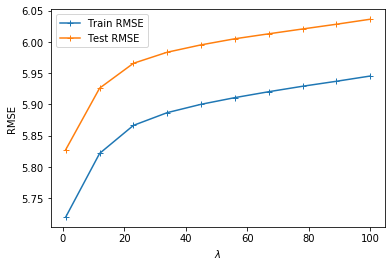

In [48]:
fig, ax = plt.subplots()

ax.plot(lambdas, train_RMSEs, '+-', c='C0', label='Train RMSE')
ax.plot(lambdas, test_RMSEs, '+-', c='C1', label='Test RMSE')

ax.set_xlabel('$\\lambda$')
ax.set_ylabel('RMSE')
ax.legend();


With increase in Lambda, model is becoming less and less complex, and thus training error as well as test error is increasing.

###  Extra Credit 3: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in neural network training. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. Tune the algorithm until you estimate the regression coefficients within a tolerance of 1e-1. Use mini-batch gradient descent in this implementation. In summary for each parameter (in our case one intercept and three slopes) the update step of the gradient (in this example $\beta_j$) at iteration $k$ of the GD algorithm becomes:

$$\beta_j=\beta_j -\frac{R}{\sqrt{G^{(k)}_j}}\frac{\partial J(\alpha,\beta_1,\ldots)}{\partial \beta_j}$$ where
$G^{(k)}_j=\sum_{i=1}^{k} (\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j})^2$ and $R$ is your learning rate. The notation $\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j}$ corresponds to the value of the gradient at iteration $(i)$. Essentially we are "storing" information about previous iteration gradients. Doing that we effectively decrease the learning rate slower when a feature $x_i$ is sparse (i.e. has many zero values which would lead to zero gradients). Although this method is not necessary for our regression problem, it is good to be familiar with these methods as they are widely used in neural network training.  

In [ ]:
# Your code here

*Discuss your results here*